In [95]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def plot_spiral_trajectory(filename1, filename2, filename3, filename4, filename5):
    filenames = [filename1, filename2, filename3, filename4, filename5]

    plt.figure(figsize=(8, 6))
    
    # Loop through all filenames
    for filename in filenames:
        kf_x, kf_y = [], []

        with open(filename, newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                kf_x.append(float(row['kf_x']))
                kf_y.append(float(row['kf_y']))

        kf_x = np.array(kf_x)
        kf_y = np.array(kf_y)

        # Modify label
        basename = os.path.basename(filename)
        model = basename.replace('spiral_', '').replace('_', ', ').replace('.csv', '')
        model = model.replace('q', 'Q = ').replace('r', 'R = ')
        model = model.replace('05', '0.5').replace('025', '0.25')

        plt.plot(kf_x, kf_y, label=model) # Plot X vs Y trajectory


    plt.title('X vs Y Spiral Trajectory')
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.grid(True)
    plt.legend(loc='upper left')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


def plot_spiral_data(filename):
    # Initialize lists to hold the data
    imu_ax, imu_ay, kf_ax, kf_ay = [], [], [], []
    kf_vx, kf_w, kf_x, kf_y = [], [], [], []
    t = []

    # Open and read the CSV file
    with open(filename, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            imu_ax.append(float(row['imu_ax']))
            imu_ay.append(float(row['imu_ay']))
            kf_ax.append(float(row['kf_ax']))
            kf_ay.append(float(row['kf_ay']))
            kf_vx.append(float(row['kf_vx']))
            kf_w.append(float(row['kf_w']))
            kf_x.append(float(row['kf_x']))
            kf_y.append(float(row['kf_y']))
            t.append(float(row['stamp']))

    # Convert t from nanoseconds to seconds
    t = np.array(t)
    t = (t - t[0])

    # Convert lists to numpy arrays for plotting
    imu_ax = np.array(imu_ax)
    imu_ay = np.array(imu_ay)
    kf_ax = np.array(kf_ax)
    kf_ay = np.array(kf_ay)
    kf_vx = np.array(kf_vx)
    kf_w = np.array(kf_w)
    kf_x = np.array(kf_x)
    kf_y = np.array(kf_y)

    # Modify label
    basename = os.path.basename(filename)
    model = basename.replace('spiral_', '').replace('_', ', ').replace('.csv', '')
    model = model.replace('q', 'Q = ').replace('r', 'R = ')
    model = model.replace('05', '0.5').replace('025', '0.25')

    plt.figure(figsize=(12, 6))

    # Plot each state vs time
    plt.plot(t, imu_ax, label='IMU Ax')
    plt.plot(t, imu_ay, label='IMU Ay')
    plt.plot(t, kf_ax, label='KF Ax')
    plt.plot(t, kf_ay, label='KF Ay')
    plt.plot(t, kf_vx, label='KF Vx')
    plt.plot(t, kf_w, label='KF W')
    plt.plot(t, kf_x, label='KF x')
    plt.plot(t, kf_y, label='KF y')
    plt.title(f'Each Individual State vs Time ({model})')
    plt.xlabel('Time (sec)')
    plt.ylabel('Magnitude')
    plt.legend(loc='upper left')
    plt.grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


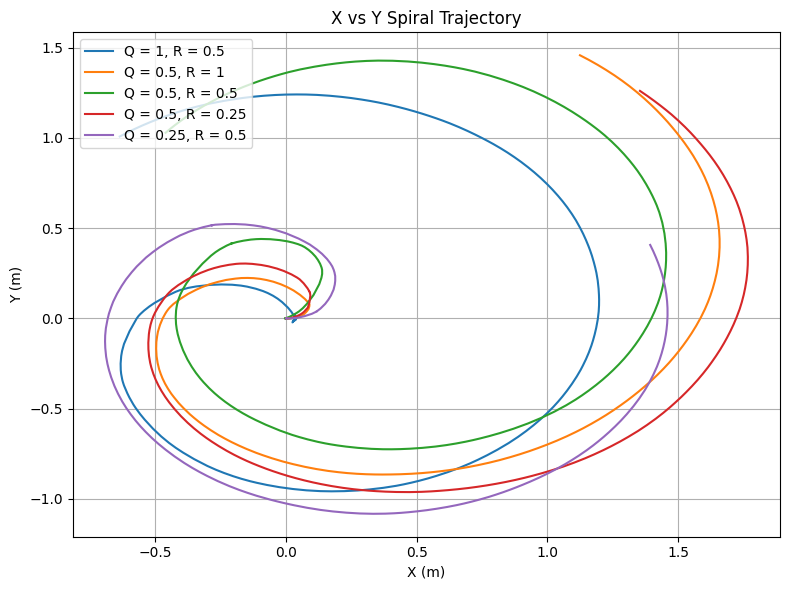

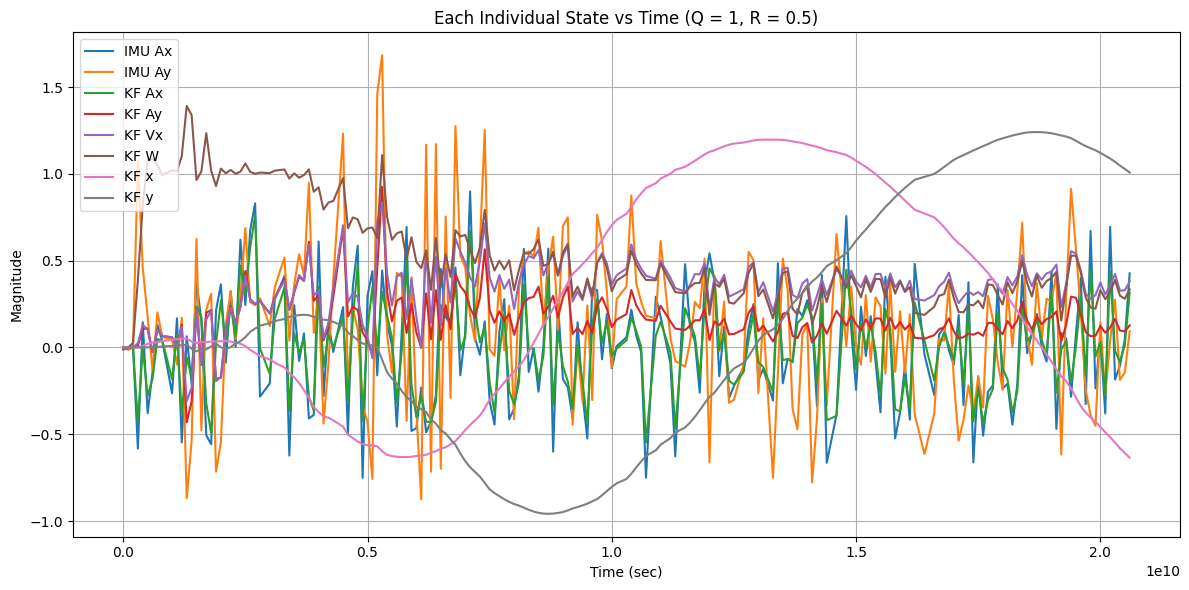

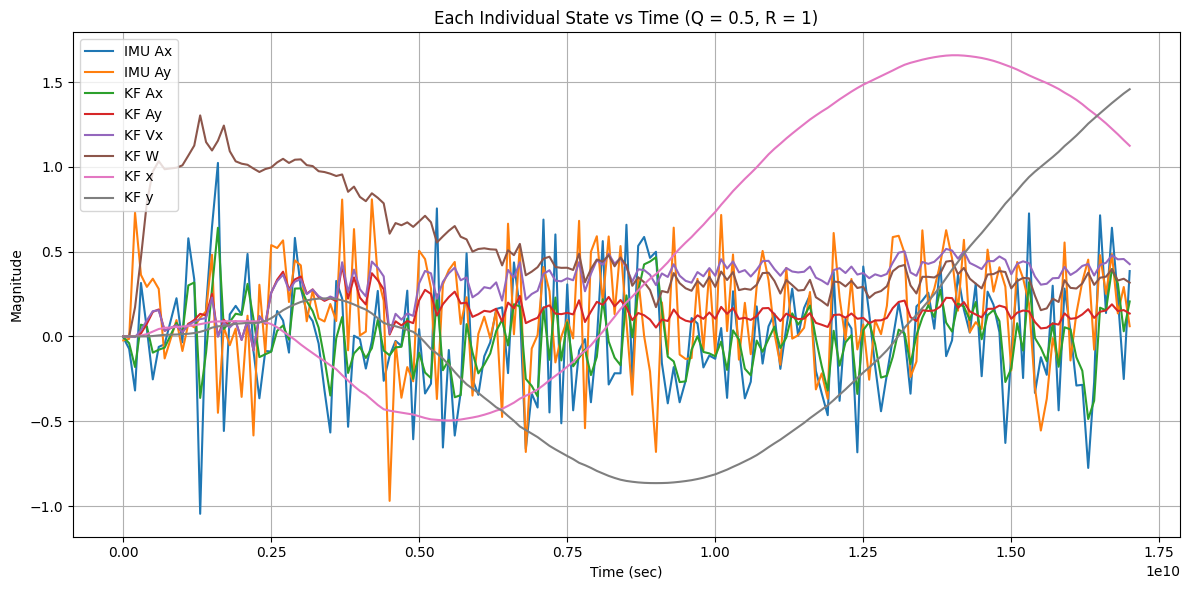

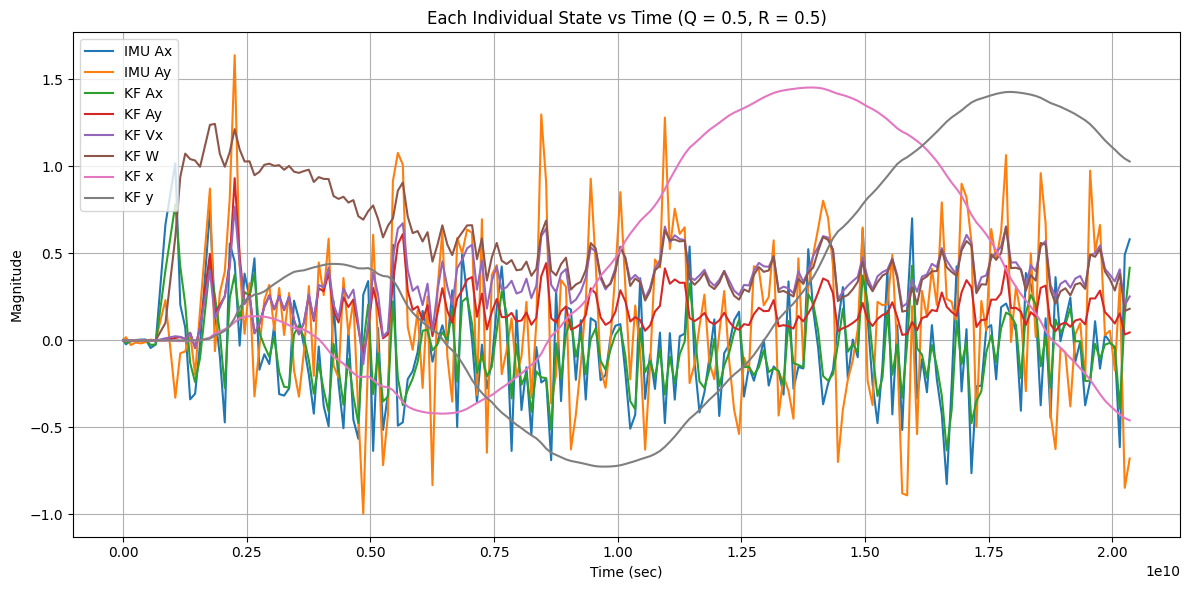

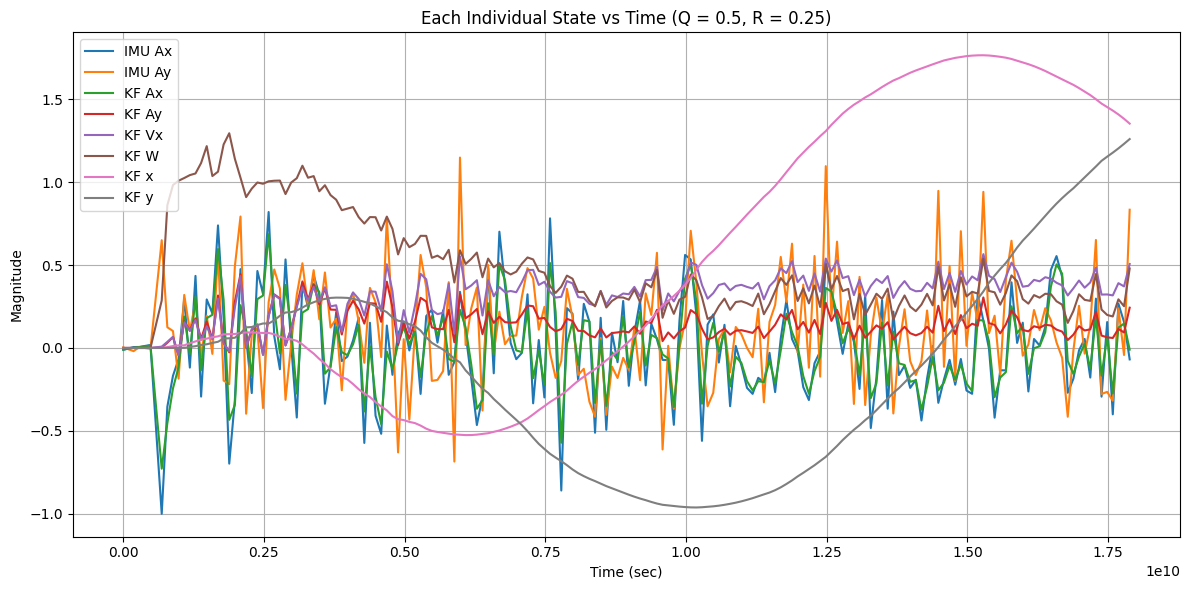

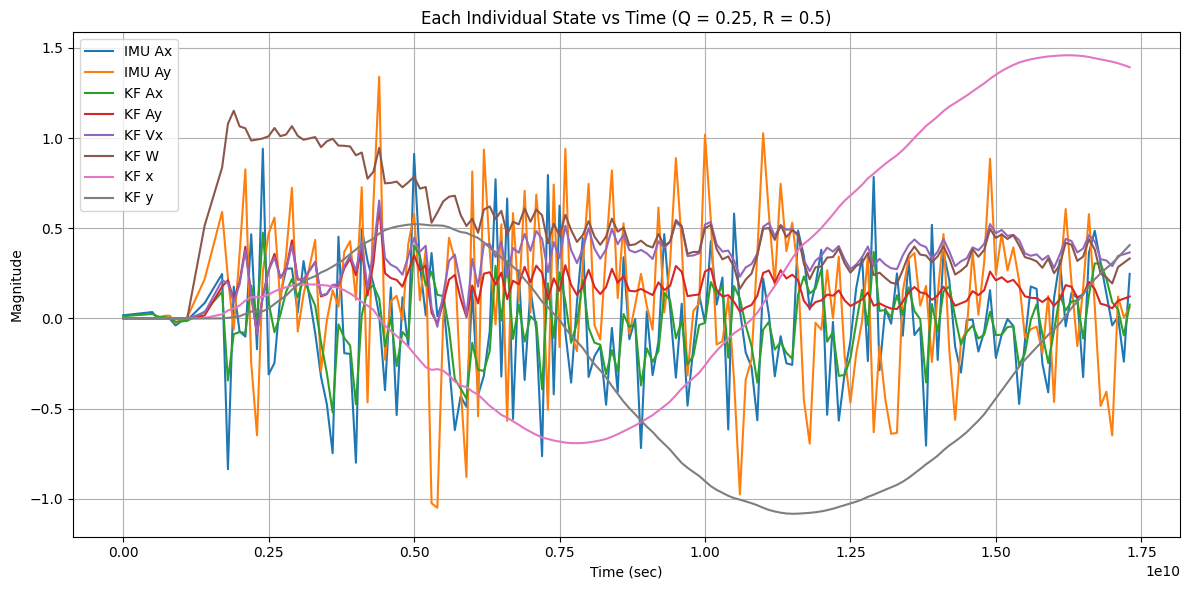

In [96]:
plot_spiral_trajectory('new_data/spiral_q1_r05.csv', 'new_data/spiral_q05_r1.csv', 'new_data/spiral_q05_r05.csv', 'new_data/spiral_q05_r025.csv', 'new_data/spiral_q025_r05.csv')

plot_spiral_data('new_data/spiral_q1_r05.csv')
plot_spiral_data('new_data/spiral_q05_r1.csv')
plot_spiral_data('new_data/spiral_q05_r05.csv')
plot_spiral_data('new_data/spiral_q05_r025.csv')
plot_spiral_data('new_data/spiral_q025_r05.csv')


In [15]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def plot_point(filename):
    # Initialize lists to hold the data
    imu_ax, imu_ay, kf_ax, kf_ay = [], [], [], []
    kf_vx, kf_w, kf_x, kf_y = [], [], [], []
    t = []

    # Open and read the CSV file
    with open(filename, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            imu_ax.append(float(row['imu_ax']))
            imu_ay.append(float(row['imu_ay']))
            kf_ax.append(float(row['kf_ax']))
            kf_ay.append(float(row['kf_ay']))
            kf_vx.append(float(row['kf_vx']))
            kf_w.append(float(row['kf_w']))
            kf_x.append(float(row['kf_x']))
            kf_y.append(float(row['kf_y']))
            t.append(float(row['stamp']))

    # Convert t from nanoseconds to seconds
    t = np.array(t)
    t = (t - t[0])

    # Convert lists to numpy arrays for plotting
    imu_ax = np.array(imu_ax)
    imu_ay = np.array(imu_ay)
    kf_ax = np.array(kf_ax)
    kf_ay = np.array(kf_ay)
    kf_vx = np.array(kf_vx)
    kf_w = np.array(kf_w)
    kf_x = np.array(kf_x)
    kf_y = np.array(kf_y)

    # Create the figure and axes for plotting
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1.5]})

    # Plot X vs Y trajectory
    axes[0].plot(kf_x, kf_y)
    axes[0].set_title('X vs Y Point Trajectory')
    axes[0].set_xlabel('X (m)')
    axes[0].set_ylabel('Y (m)')
    axes[0].grid(True)
    
    # Plot each state vs time
    axes[1].plot(t, imu_ax, label='IMU Ax')
    axes[1].plot(t, imu_ay, label='IMU Ay')
    axes[1].plot(t, kf_ax, label='KF Ax')
    axes[1].plot(t, kf_ay, label='KF Ay')
    axes[1].plot(t, kf_vx, label='KF Vx')
    axes[1].plot(t, kf_w, label='KF W')
    axes[1].plot(t, kf_x, label='KF x')
    axes[1].plot(t, kf_y, label='KF y')
    axes[1].set_title('Each Individual State vs Time (Point)')
    axes[1].set_xlabel('Time (sec)')
    axes[1].set_ylabel('Magnitude')
    axes[1].legend()
    axes[1].grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


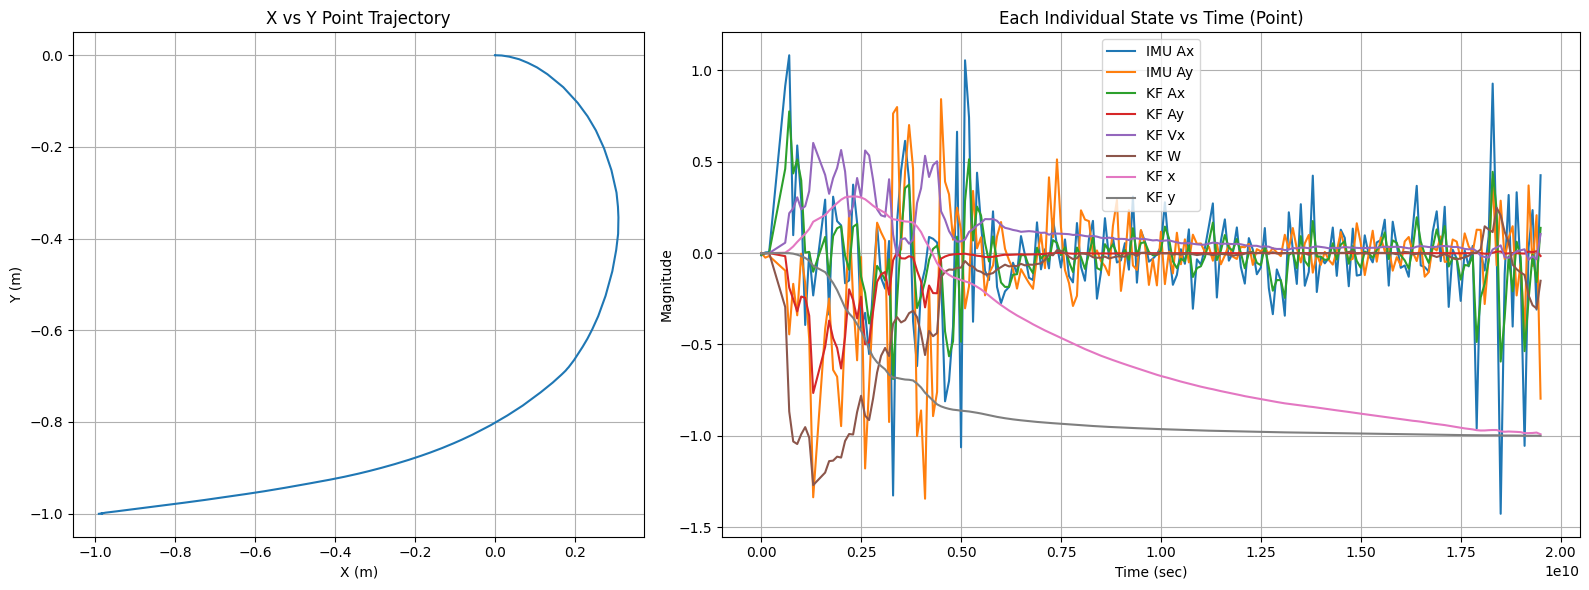

In [16]:
plot_point('point/robotPose.csv')